<a href="https://colab.research.google.com/github/FGalvao77/Modelo-ARIMA-para-analise-de-series-temporais/blob/main/Modelo_ARIMA_para_an%C3%A1lise_de_s%C3%A9ries_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo ARIMA para análise de séries temporais**

---



# <font color='lightblue'>**ARIMA**</font>



Em estatística e econometria, particularmente em análise de séries temporais, um modelo auto-regressivo integrado de médias móveis (**autoregressive integrated moving average** ou ``ARIMA``, na sigla em inglês) é uma generalização de um modelo auto-regressivo de médias móveis (ARMA). Ambos os modelos são ajustados aos dados da série temporal para entender melhor os dados ou para prever pontos futuros na série. Modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, em que um passo inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicado uma ou mais vezes para eliminar a não estacionariedade.

A parte auto-regressiva (AR) do modelo ARIMA indica que a variável evoluinte de interesse é regressada em seus próprios valores defasados, isto é, anteriores. A parte de média móvel (MA) indica que o erro de regressão é na verdade uma combinação linear dos termos de erro, cujos valores ocorreram contemporaneamente e em vários momentos no passado. A parte integrada (I) indica que os valores de dados foram substituídos com a diferença entre seus valores e os valores anteriores e este processo diferenciador pode ter sido realizado mais de uma vez. O propósito da cada uma destas características é fazer o modelo se ajustar aos dados da melhor forma possível.

Fontes:
- https://pt.wikipedia.org/wiki/ARIMA#:~:text=Em%20estat%C3%ADstica%20e%20econometria%2C%20particularmente,de%20m%C3%A9dias%20m%C3%B3veis%20(ARMA).
- https://medium.com/techbloghotmart/dicas-para-criar-um-modelo-de-previs%C3%A3o-de-s%C3%A9ries-temporais-d4bb2e32e148
- http://sillasgonzaga.com/material/curso_series_temporais/
- https://s3.ibpad.com.br/seriestemporais/

In [ ]:
# instalando as biliotecas necessárias
!pip install bs4
!pip install plotly

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import datetime
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as Dash
import seaborn as sns
import matplotlib.pyplot as plt

Para aplicação do `ARIMA` irei realizar uma raspagem de dados do site de **Secretária de Segurança Pública de São Paulo**.

Irei coletar os dados de registros de ocorrências e, analizarei um item específico sobre _porte ilegal de arma_. E através da série temporal de registros históricos, tentarei realizar a previsão como o modelo de ocorrências futuras.

In [ ]:
# instanciando a url do site de interesse
url = 'http://www.ssp.sp.gov.br/Estatistica/Pesquisa.aspx'

# carregando a página com uso da biblioteca "requests" e com a função ".get()" passando como argumento a variável "url"
page = requests.get(url)

# visualizando a resposta da requisição
page

<Response [200]>

In [ ]:
# com a bibiloteca "BeautifulSoup" iremos "raspar" o site, para isso passando como argumentos:
# a variável ("page") da requisição juntamente com a função ".text"
# e a classe "html.parser"
data = BeautifulSoup(page.text, 'html.parser')

# visualizando o resultado da "raspagem"
data


<!DOCTYPE html>

<html ng-app="modPortal" xmlns="http://www.w3.org/1999/xhtml">
<head ng-controller="ctrlHead"><meta content="!" name="fragment"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<title>
	SSP
</title>
<!-- Bootstrap core CSS -->
<link href="/Content/bootstrap.min.css" rel="stylesheet"/>
<!-- Bootstrap theme -->
<link href="/Content/bootstrap-theme.min.css" rel="stylesheet"/>
<!-- IE10 viewport hack for Surface/desktop Windows 8 bug -->
<link href="/Content/ie10-viewport-bug-workaround.css" rel="stylesheet"/>
<!-- Custom styles for this template -->
<link href="/Content/theme.css" rel="stylesheet"/><link href="/Content/SearchForm.css" rel="stylesheet"/><link href="/Content/proxima.css" rel="stylesheet"/><link href="/C

In [ ]:
data.get_attribute_list

<bound method Tag.get_attribute_list of 
<!DOCTYPE html>

<html ng-app="modPortal" xmlns="http://www.w3.org/1999/xhtml">
<head ng-controller="ctrlHead"><meta content="!" name="fragment"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<title>
	SSP
</title>
<!-- Bootstrap core CSS -->
<link href="/Content/bootstrap.min.css" rel="stylesheet"/>
<!-- Bootstrap theme -->
<link href="/Content/bootstrap-theme.min.css" rel="stylesheet"/>
<!-- IE10 viewport hack for Surface/desktop Windows 8 bug -->
<link href="/Content/ie10-viewport-bug-workaround.css" rel="stylesheet"/>
<!-- Custom styles for this template -->
<link href="/Content/theme.css" rel="stylesheet"/><link href="/Content/SearchForm.css" rel="stylesheet"/><link href="/Content/proxi

In [ ]:
# visualizando o "título" da página do site
data.title

<title>
	SSP
</title>

In [ ]:
# coletando as informações das tabelas, para isso utilizamos a função ".find_all" e o resultado armazenamos na variável "tables"
tables = data.find_all('table', attrs={'class': 'table table-striped table-hover table-condensed'})

# visualizando a quantidade de tabelas encontradas
print('Localizado', len(tables), 'tabelas')

Localizado 3 tabelas


In [ ]:
# Labels, Jan, Fev, Mar, Abr, Mai, Jun, Jul, Ago, Set, Out, Nov, Dez, Ano = [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [ ]:
# start_register = datetime.datetime(2021,7,1)

## **Tratamento dos dados**

In [ ]:
# criando listas para salvar o resultado da coleta das informações
Labels, Jan, Fev, Mar, Abr, Mai, Jun, Jul, Ago, Set, Out, Nov, Dez, Ano = [], [], [], [], [], [], [], [], [], [], [], [], [], []

# definindo uma data inicial
start = datetime.datetime(2021,7,1)

# instanciando o contador
count = 0

# realizando um loop com o "for" para coletar as informações da variável "tables"
for info in tables:
  ## "tr", "span" e "td" são tags HTML para identificar de onde queremos os dados
  line = info.find_all('tr')[4]         # filtrando a linha da tabela
  label = line.find_all('td')[0].text   # filtrando o rótulo da tabela

  # filtrando as demais informações
  info_jan = line.find_all('td')[1].text
  info_fev = line.find_all('td')[2].text
  info_mar = line.find_all('td')[3].text
  info_abr = line.find_all('td')[4].text
  info_mai = line.find_all('td')[5].text
  info_jun = line.find_all('td')[6].text
  info_jul = line.find_all('td')[7].text
  info_ago = line.find_all('td')[8].text
  info_set = line.find_all('td')[9].text
  info_out = line.find_all('td')[10].text
  info_nov = line.find_all('td')[11].text
  info_dez = line.find_all('td')[12].text

  # realizando o cálculo da data do registro
  date = start - relativedelta(years=count)

  # caso o conteúdo "OCORRÊNCIAS DE PORTE ILEGAL DE ARMA" seja encontrado iremos guardar os resultados nas respectivas listas
  if label == 'OCORRÊNCIAS DE PORTE ILEGAL DE ARMA':
    Labels.append(label)
    Jan.append(info_jan)
    Fev.append(info_fev)
    Mar.append(info_mar)
    Abr.append(info_abr)
    Mai.append(info_mai)
    Jun.append(info_jun)
    Jul.append(info_jul)
    Ago.append(info_ago)
    Set.append(info_set)
    Out.append(info_out)
    Nov.append(info_nov)
    Dez.append(info_dez)
    Ano.append(date)

  # caso não seja encontrado, iremos ignorar
  else:
    pass

  # somando ao contador para realizar o desagiu no ano
  count = count + 1

# criando um dicionário de dados
data_dict = {'Label': Labels,
             'Jan': Jan,
             'Fev': Fev,
             'Mar': Mar,
             'Abr': Abr,
             'Mai': Mai,
             'Jun': Jun,
             'Jul': Jul,
             'Ago': Ago,
             'Set': Set,
             'Out': Out,
             'Nov': Nov,
             'Dez': Dez,
             'Ano': Ano
             }

# instanciando o dicionário em um dataframe
data_base = pd.DataFrame(data_dict)

# visualizando o dataframe criado
data_base

,Label,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Ano
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,311,353,391,330,357,359,313,...,...,...,...,...,2021-07-01
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,371,349,363,307,435,394,376,386,409,399,346,306,2020-07-01
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,415,363,491,476,445,414,434,438,400,464,360,372,2019-07-01


In [ ]:
# reorganizando as linhas e colunas do dataframe com a função ".melt()"
# e passando como argumento uma lista para "id_vars"
df = data_base.melt(id_vars=['Label', 'Ano'])
df.head(10)

,Label,Ano,variable,value
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021-07-01,Jan,311
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020-07-01,Jan,371
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019-07-01,Jan,415
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021-07-01,Fev,353
4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020-07-01,Fev,349
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019-07-01,Fev,363
6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021-07-01,Mar,391
7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020-07-01,Mar,363
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019-07-01,Mar,491
9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021-07-01,Abr,330


In [ ]:
# da coluna "Ano" iremos filtrar somente o ano e instanciando a respectiva informação para a coluna "Ano"
df['Ano'] = df['Ano'].dt.year

# visualizando o resultado
df

,Label,Ano,variable,value
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Jan,311
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Jan,371
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Fev,353
4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Fev,349
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363
6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Mar,391
7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Mar,363
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491
9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Abr,330


In [ ]:
# criando uma coluna númerica para sequenciar o número do mês 
# para isso, iremos instanciar duas listas

# "lista1" para descrição dos meses
lista1 = [
         (df['variable'] == 'Jan'),
         (df['variable'] == 'Fev'),
         (df['variable'] == 'Mar'),
         (df['variable'] == 'Abr'),
         (df['variable'] == 'Mai'),
         (df['variable'] == 'Jun'),
         (df['variable'] == 'Jul'),
         (df['variable'] == 'Ago'),
         (df['variable'] == 'Set'),
         (df['variable'] == 'Out'),
         (df['variable'] == 'Nov'),
         (df['variable'] == 'Dez')
]

# "lista2" para número representativo do mês
lista2 = [1,2,3,4,5,6,7,8,9,10,11,12]

# utilizando a função do numpy ".select()" e passando com argumentos
# para sequenciar as listas e associando o mês com seu respectivo número
df['Mês'] = np.select(lista1, lista2)

# visualizando o resultado
df

,Label,Ano,variable,value,Mês
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Jan,311,1
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Jan,371,1
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Fev,353,2
4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Fev,349,2
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Mar,391,3
7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Mar,363,3
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Abr,330,4


In [ ]:
# realizando a exclusão das linhas que possui os caracteres "..."
df.drop(df.loc[df['value'] == '...'].index, inplace=True)

# visualizando o resultado
df

,Label,Ano,variable,value,Mês
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Jan,311,1
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Jan,371,1
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Fev,353,2
4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Fev,349,2
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Mar,391,3
7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2020,Mar,363,3
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2021,Abr,330,4


In [ ]:
# ordenando o dataframe por "Ano" e "Mês"
df = df.sort_values(by=['Ano', 'Mês'], ascending=True)

# visualizando o resultado das 5 primeiras linhas
df.head()

,Label,Ano,variable,value,Mês
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
11,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Abr,476,4
14,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mai,445,5


In [ ]:
# resetando o índice
df = df.reset_index()

# visualizando o resultado
df

,index,Label,Ano,variable,value,Mês
0,2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
1,5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
2,8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
3,11,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Abr,476,4
4,14,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mai,445,5
5,17,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jun,414,6
6,20,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jul,434,7
7,23,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Ago,438,8
8,26,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Set,400,9
9,29,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Out,464,10


In [ ]:
# excluindo a coluna "index"
del df['index']

# visualizando o resultado
df

,Label,Ano,variable,value,Mês
0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Abr,476,4
4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mai,445,5
5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jun,414,6
6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jul,434,7
7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Ago,438,8
8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Set,400,9
9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Out,464,10


In [ ]:
# criando uma coluna para ordenar o dataframe
df = df.rename_axis('index').reset_index()

# visualizando o resultado
df

,index,Label,Ano,variable,value,Mês
0,0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1
1,1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2
2,2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3
3,3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Abr,476,4
4,4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mai,445,5
5,5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jun,414,6
6,6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jul,434,7
7,7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Ago,438,8
8,8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Set,400,9
9,9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Out,464,10


In [ ]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     31 non-null     int64 
 1   Label     31 non-null     object
 2   Ano       31 non-null     int64 
 3   variable  31 non-null     object
 4   value     31 non-null     object
 5   Mês       31 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.6+ KB


In [ ]:
# formatando o tipo de dado das colunas
df['value'] = pd.to_numeric(df['value'])
df['Ano'] = df['Ano'].astype(str)

# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     31 non-null     int64 
 1   Label     31 non-null     object
 2   Ano       31 non-null     object
 3   variable  31 non-null     object
 4   value     31 non-null     int64 
 5   Mês       31 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.6+ KB


In [ ]:
# criando nova coluna "Data" e concatenando as informações da variáveis "variable" e "Ano"
df['Data'] = df['variable'] + ' ' + df['Ano']

# visualizando o resultado
df

,index,Label,Ano,variable,value,Mês,Data
0,0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jan,415,1,Jan 2019
1,1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Fev,363,2,Fev 2019
2,2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mar,491,3,Mar 2019
3,3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Abr,476,4,Abr 2019
4,4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Mai,445,5,Mai 2019
5,5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jun,414,6,Jun 2019
6,6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Jul,434,7,Jul 2019
7,7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Ago,438,8,Ago 2019
8,8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Set,400,9,Set 2019
9,9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,2019,Out,464,10,Out 2019


In [ ]:
# excluindo as colunas não mais necessárias
del df['variable']; del df['Ano']; del df['Mês']

# visualizando o resultado
df

,index,Label,value,Data
0,0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,415,Jan 2019
1,1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,363,Fev 2019
2,2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,491,Mar 2019
3,3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,476,Abr 2019
4,4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,445,Mai 2019
5,5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,414,Jun 2019
6,6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,434,Jul 2019
7,7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,438,Ago 2019
8,8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,400,Set 2019
9,9,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,464,Out 2019


In [ ]:
# definindo a coluna data como índice
df = df.set_index('Data')

# visualizando o resultado
df

,index,Label,value
Data,,,
Jan 2019,0,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,415
Fev 2019,1,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,363
Mar 2019,2,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,491
Abr 2019,3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,476
Mai 2019,4,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,445
Jun 2019,5,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,414
Jul 2019,6,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,434
Ago 2019,7,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,438
Set 2019,8,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,400


In [ ]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Jan 2019 to Jul 2021
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   31 non-null     int64 
 1   Label   31 non-null     object
 2   value   31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


## **Visualização gráfica dos dados**

In [ ]:
# criando um gráfico dinâmico, onde podemos filtrar informações pela legenda
# utilizando o "Zoom"

# instancaindo a figura
fig = Dash.Figure()

# instanciando os eixos do gráfico
fig.add_trace(Dash.Scatter(x = df.index, y = df.value, 
                           mode = 'lines', name = 'Quantidade'))

# definindo o layout do gráfico
fig.update_layout(title = 'Histórico de Ocorrência de Porte Ilegal de Arma - Estado de São Paulo', 
                  titlefont_size = 28) # tamanho da fonte

# parâmetros dos eixos X e Y
x_axis = dict(
    title = 'Período histórico', # título do eixo X
    titlefont_size = 16,         # tamanho da fonte do título
    tickfont_size = 14           # tamanho da fonte do eixo
),

height = 500, # tamanho do gráfico

y_axis = dict(
    title = 'Quantidade', # título do eixo Y
    titlefont_size = 16,         # tamanho da fonte do título
    tickfont_size = 14           # tamanho da fonte do eixo
), 

# parâmetros da legenda
legend = dict(
    x = 1,  y = 1,                       # posição de localização da legenda
    bgcolor = 'rgba(255,255,255,0)',    # cor de fundo
    bordercolor = 'rgba(255,255,255,0)' # cor da borda
)

# plotandoo gráfico
fig.show()


## **Treinando o modelo**

In [ ]:
!pip install pmdarima

In [ ]:
# importando a função da biblioteca "auto_rima"
# import pmdarima as pm
from pmdarima.arima import auto_arima

In [ ]:
# criando uma função com o auxílio do "auto_rima"
func_auto_rima = auto_arima(
    df['value'],                # dados de treino
    start_p = 1, start_q = 1,   # período inicial
    max_p = 6, max_q = 6,       # maior valor para o período inicial
    m = 12,                     # período para diferenciação sazional
    start_P = 0,                # ordenação da parte autoregressiva do modelo sazonal
    seasonal = True,            # período sazonal
    d = 1,                      # ordenação da primeira diferença
    D = 1,                      # ordenação da diferenciação sazonal
    trace = True,               # visualizaçõa da saída da série
    erro_action = 'ignore',     # para ignorar erros
    stepwise = True             # buscando o melhor resultado de forma rápida
)                               ## se utilizar "False", será utilizada força bruta do modelo
                                ## normalmente "False" tem o melhor resultado

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=202.991, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=203.000, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=202.882, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=204.876, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=202.876, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=204.866, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 2.768 seconds


## **Realizando teste**

In [ ]:
# verificando a melhor performance do modelo
func_auto_rima.aic()

202.8763242152465

In [ ]:
# analisando o resultado do auto rima
func_auto_rima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   31
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -99.438
Date:                              Sat, 18 Sep 2021   AIC                            202.876
Time:                                      16:08:42   BIC                            204.657
Sample:                                           0   HQIC                           203.122
                                               - 31                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7501      2.340     -0.321      0.748      -5.336       3.835
sigma2      2577.5279   5709.990      0.451      0.652   -8613.848    1.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.16   Prob(JB):                         0.47
Heteroskedasticity (H):               0.36   Skew:                             0.69
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# definindo o tamanho da base de dados para treino do modelo
tam = int(len(df) * 0.75) # estamos utilizando 75% dos dados para treino

# separando os dados de treino e para teste
train_data, test_data = df['value'][0: tam], df['value'][tam:]

In [ ]:
# visualizando o tamanho das base de treino e teste
len(train_data), len(test_data)

(23, 8)

In [ ]:
# outra forma de visualizar o tamanho das bases - treino e teste
train_data.shape, test_data.shape

((23,), (8,))

In [ ]:
# treinando o modelo com a base de treino
func_auto_rima.fit(train_data)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# realizando a predições com a base de teste
predictions = func_auto_rima.predict(n_periods = len(test_data))

# instanciando as predições em um dataframe
prediction_data = pd.DataFrame(predictions, index = test_data.index, 
                               columns = ['Predictions'])

# visualizando o dataframe
prediction_data

,Predictions
Data,
Dez 2020,357.968331
Jan 2021,358.065803
Fev 2021,321.469518
Mar 2021,391.025181
Abr 2021,355.084458
Mai 2021,405.408628
Jun 2021,369.336404
Jul 2021,369.884197


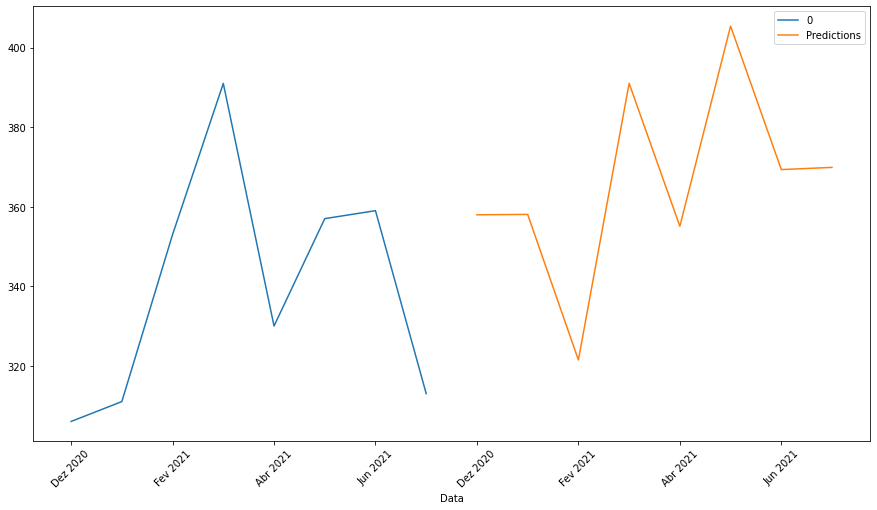

In [ ]:
# concatenando os dados reais Vs predições
final_data = pd.concat([test_data, prediction_data])

# visualizando de forma gráfica o resultado
final_data.plot(figsize=(15,8))
plt.xticks(rotation=45);

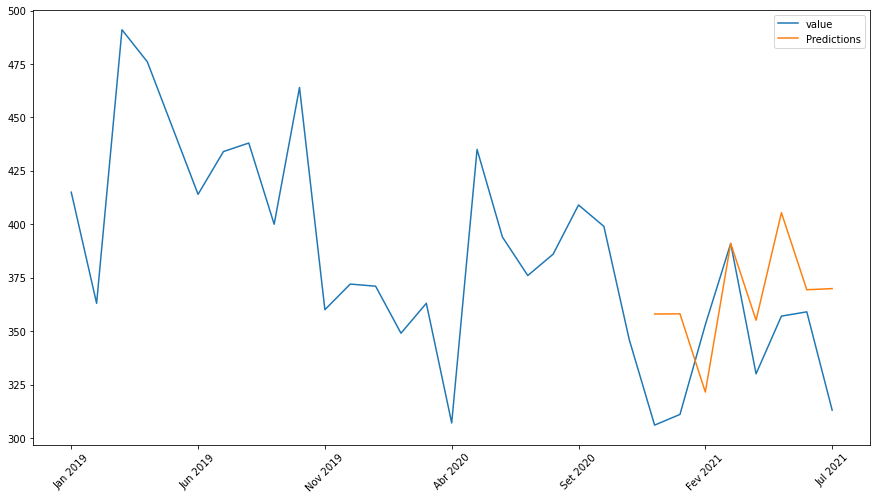

In [ ]:
# concatenado os dados reais com das predições
final_data2 = pd.concat([df['value'], prediction_data], 
                        axis = 1)

# plotando o gráfico
final_data2.plot(figsize=(15,8))
plt.xticks(rotation=45);

In [ ]:
# importando a função para cálculo do erro médio quadrático
from sklearn.metrics import mean_squared_error

In [ ]:
# calculando o erro médio quadrático
mean_squared_error(test_data, prediction_data)

1528.1684396923183

In [ ]:
# treinando o modelo com todo o conjunto de dados
func_auto_rima.fit(df['value'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# realizando a predições até o final do ano
pred_year = func_auto_rima.predict(n_periods=6)
pred_year

array([320.11350258, 313.84023073, 339.33550547, 261.92795999,
       246.90109327, 249.40101388])

In [ ]:
# criando uma lista de datas futuras
lista_datas = ['Ago 2021','Set 2021','Out 2021','Nov 2021','Dez 2021',
               'Jan 2022']

In [ ]:
# incluindo os dados das predições em um dataframe
future_pred = pd.DataFrame(pred_year, index = lista_datas, 
                           columns = ['Predicções futuras'])

future_pred

,Predicções futuras
Ago 2021,320.113503
Set 2021,313.840231
Out 2021,339.335505
Nov 2021,261.927960
Dez 2021,246.901093
Jan 2022,249.401014


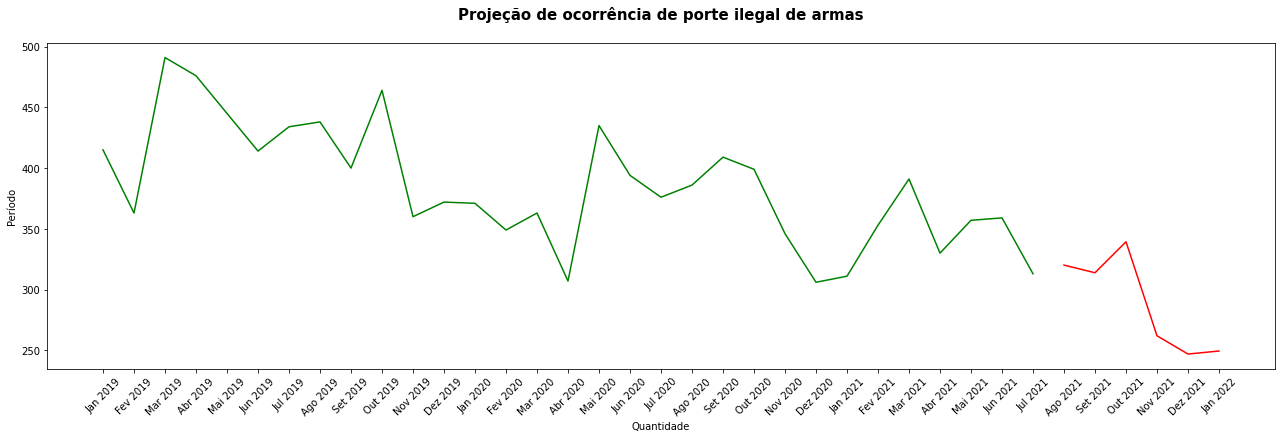

In [ ]:
# plotando gráfico 
plt.figure(figsize=(22,6))  # tamanho do gráfico
plt.title('Projeção de ocorrência de porte ilegal de armas\n', 
          fontsize = 15, fontweight = 'bold')  # título do gráfico
plt.xlabel('Quantidade')  # nome do eixo X
plt.ylabel('Período')     # nome do eixo Y
plt.xticks(rotation=45)   # rotacioando a descrição dos índices do eixo X
plt.plot(df['value'], color = 'green')  # cor da linha do dataframe real
plt.plot(future_pred, color = 'red')    # cor da linha do dataframe predito
plt.show();  